<a href="https://colab.research.google.com/github/q1ngyM/Github_Colab/blob/main/Dict/myPLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
from google.colab import drive
import csv
# 获取多列的数据
with open('drive/MyDrive/Data/data.csv',encoding='utf-8') as data:
    reader = data.readlines()[1:]
    data_set = [l.rstrip().split(',') for l in reader]


# 根据7:3的比例划分训练集和验证集
data_set = np.array(data_set)

train_size = int(0.7 *len(data_set))
training_set = data_set[:train_size]
valiadation_set = data_set[train_size:]



In [109]:
X = training_set[:,:2]
X = np.array(X).astype(float)
y = training_set[:,2]
y = np.array(y).astype(float)

In [118]:
class Perceptron():
  def __init__(self):
    pass

  def step_function(self, a):
    return 1 if a >=0 else 0

  def train(self, X, Y, lr = 0.05, epochs = 10):
    weights = np.zeros(2)
    bias = 0

    #训练
    for epoch in range(epochs):
      for i in range(len(X)):
        x = np.array(X[i])
        y = np.array(Y[i])
        weights, bias = self.PLA(weights, bias, lr, x, y)
    return weights, bias

  def PLA(self, weight, bias, lr, x, y):

    a = np.dot(weight, x) + bias  # 计算线性组合

    yhat = self.step_function(a)  # 分类

    error = y - yhat

    #update weight and bias
    weight += lr * error * x
    bias += lr * error

    return weight, bias

  def sigmoid(self, x):
    """
    sigmoid激活函数及其导数计算
    """
    f = 1 / (1 + np.exp(-x))
    return f


  def loss(self, y, yhat):
    """
    参数：
    y -- 实际值
    yhat -- 预测值

    返回值：
    loss -- 交叉熵损失
    """
    loss = -(y * np.log(yhat) + (1-y) * np.log(1 - yhat))
    return loss



In [119]:
p = Perceptron()

In [138]:
w_trained, b_trained = p.train(X, y, lr = 0.05, epochs = 10000)
print(w_trained)
print(b_trained)

[-372334.10000014    2600.        ]
-14463.199999929779


In [ ]:
class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)



In [134]:
import numpy.random as nr
plt.rcParams['figure.figsize'] = (12,12) # 固定图像大小
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

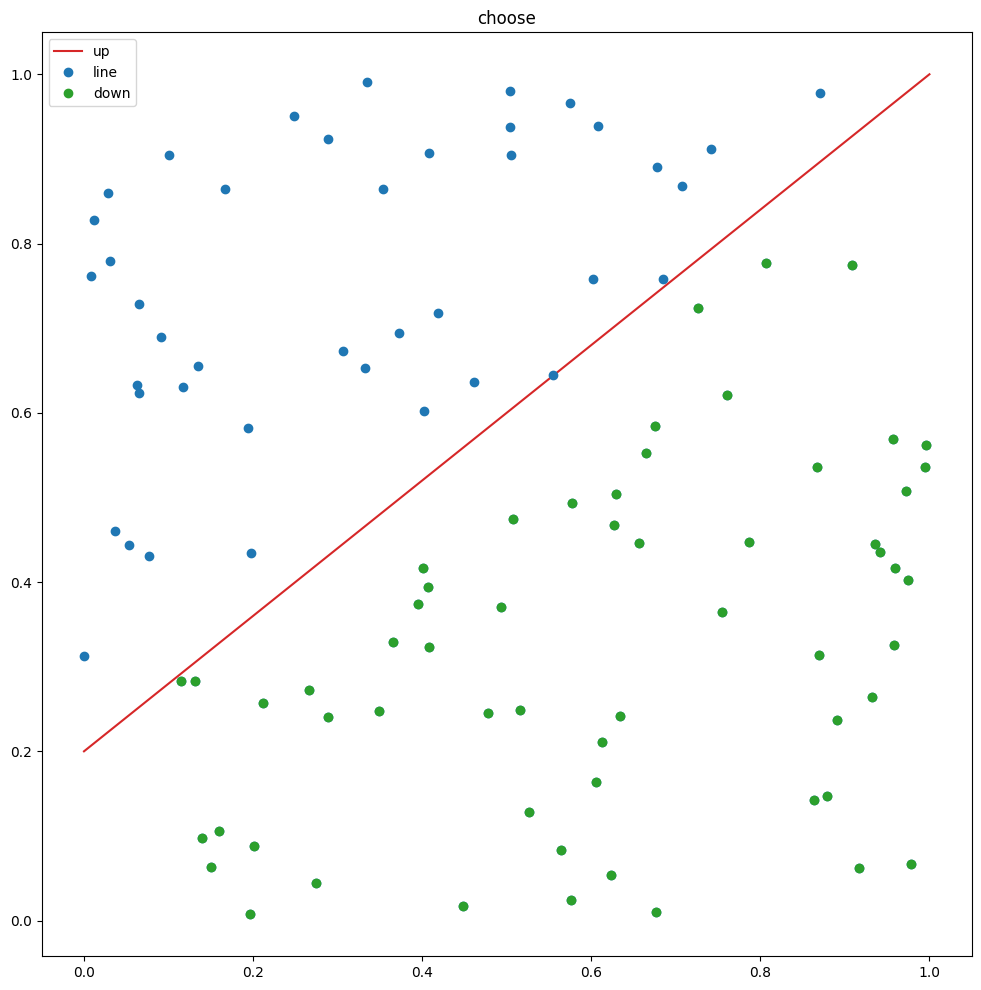

In [135]:
# 生成随机点
N = 100
xn = nr.rand(N, 2) # 第一列为横轴，第二列为纵轴
x = np.linspace(0, 1) # 选取[0,10]上的线性分布

# 选取一线性函数
# a, b = nr.rand(), nr.rand()
a, b = 0.8, 0.2
f = lambda x : a*x + b

def print(xn, dn, w):
  if(w[2] == 0)
plt.plot(x, f(x), 'tab:red')
dn = np.zeros([N, 1]) # 点在分割线上方为1，反之为-1

def print_base(xn, dn):
    plt.plot(xn[:,0], xn[:,1],  'o', color='tab:blue') # 蓝色，圆点
    for i in range(N):
        if (f(xn[i, 0]) > xn[i, 1]): # 分割线下方
            dn[i] = 1
            plt.plot(xn[i, 0], xn[i, 1], 'o', color='tab:green')
        else:
            dn[i] = -1 # 分割线上方


print_base(xn, dn)
plt.legend(['up', 'line', 'down'])
plt.title('choose')
plt.show()

In [44]:
p = Perceptron()
w_trained, b_trained = p.train(X, y, learning_rate=0.05, n_iters=500)

y_p_train = p.predict(X)


print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y)) * 100}%")



ValueError: non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,280)

# 新段落